# ¡Hola, Bastian!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import matplotlib.pyplot as plt #importo libreria de histograma de graficos para seccion 7
import pandas as pd #importo libreria pandas para acceder al .csv

<div class="alert alert-block alert-info">
<b>Las 2 librerias usadas a lo largo del proyecto fueron cargadas aca.</b> <a class="tocSkip"></a>
</div>

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';') 
products = pd.read_csv('/datasets/products.csv', delimiter=';')
aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')
departments = pd.read_csv('/datasets/departments.csv', delimiter=';')
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')# leer conjuntos de datos en los DataFrames

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>


In [3]:
print(orders.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
print(products.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
print(aisles.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
print(departments.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
print(order_products.info(show_counts=True))# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Los archivos CSV tienen un problema de formato con el delimitador (;), lo que causa que las funciones de lectura de Pandas no reconozcan correctamente las columnas. Los DataFrames resultantes presentan una sola columna que contiene todas las demás, como se muestra en las impresiones de 'info()'. Para solucionarlo, reescribi inicialmente el codigo para que al leer los archivos CSV especificando el delimitador correcto mediante el parámetro 'delimiter' en 'pd.read_csv()'.

Solucionado el tema del delimitador puedo concluir de los datos mostrados:

Orders DataFrame:
* 478,967 entradas
* 6 columnas: order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order
* Contiene valores nulos en la columna 'days_since_prior_order'.

Products DataFrame:
* 49,694 entradas
* 4 columnas: product_id, product_name, aisle_id, department_id
* Contiene valores nulos en la columna 'product_name'.

Aisles DataFrame:
* 134 entradas
* 2 columnas: aisle_id, aisle

Departments DataFrame:
* 21 entradas
* 2 columnas: department_id, department

Order_Products DataFrame:
* 4,545,007 entradas
* 4 columnas: order_id, product_id, add_to_cart_order, reordered
* Contiene valores nulos en la columna 'add_to_cart_order'.

Las inferencias posibles incluyen:
* Hay valores nulos en las columnas 'days_since_prior_order', 'product_name' y 'add_to_cart_order'.
* El conjunto de datos de pedidos (orders) contiene información sobre la frecuencia de pedidos por día y hora, así como la historia de pedidos anteriores.
* El conjunto de datos de productos (products) proporciona información sobre los productos, incluidos su nombre, aisle_id y department_id.
* Los conjuntos de datos de aisles (aisles) y departments (departments) contienen información sobre las categorías de pasillos y departamentos.
* El conjunto de datos de order_products (order_products) contiene información sobre los productos en cada pedido, incluido el orden de agregado al carrito y si el producto fue vuelto a pedir.

 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has hecho bien con esta exploración inicial de datos y la lectura inicial de los problemas.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

* Verifica y corrige los tipos de datos: 
Vamos a verificar y corregir los tipos de datos de las columnas, asegurándonos de que las columnas de ID sean números enteros y manejando adecuadamente otras conversiones de tipo según sea necesario.Utilizaremos el método 'pd.to_numeric()' de pandas. 

* Identifica y completa los valores ausentes: 
Revisaremos cada DataFrame en busca de valores ausentes y decidiremos cómo abordarlos. Dependiendo del contexto, podríamos optar por eliminar filas con valores ausentes, imputar valores utilizando medias o modas, o utilizar otras estrategias según sea necesario.Utilizaremos el método 'isnull()'

* Identifica y elimina los valores duplicados: 
Para cada DataFrame, buscaremos y eliminaremos valores duplicados, asegurándonos de mantener únicamente las filas únicas.Utilizaremos el método 'duplicated()' de pandas y luego utilizar el método 'drop_duplicates()' para eliminar las filas duplicadas. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
duplicate_orders = orders[orders.duplicated()]
print(duplicate_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
* todas estas columnas tienen los mismos valores en ambas filas duplicadas.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m
wednesday_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(wednesday_2am_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
* que hay filas duplicadas en el conjunto de datos de pedidos '(orders)'. Cada fila representa un pedido, y las filas duplicadas tienen exactamente los mismos valores en todas las columnas

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop=True)

<div class="alert alert-block alert-info">
<b>hecho</b> <a class="tocSkip"></a>
</div>

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(orders[orders.duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicates_order_id = orders[orders.duplicated('order_id', keep=False)]
print(duplicates_order_id[['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos:

* Eliminé filas duplicadas en el conjunto de datos de pedidos y examiné los pedidos realizados el miércoles a las 2:00 a.m. para entender mejor el comportamiento de compra en ese momento específico.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
duplicate_rows = products[products.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
duplicate_department_ids = products[products.duplicated(subset=['department_id'])]
print(duplicate_department_ids[['department_id']])

       department_id
4                 13
6                  7
7                  1
9                  7
10                 7
...              ...
49689              7
49690             14
49691             14
49692             11
49693              1

[49673 rows x 1 columns]


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name_upper'] = products['product_name'].str.upper()
duplicate_product_names = products[products.duplicated(subset=['product_name_upper'])]
print(duplicate_product_names[['product_name']])

                                          product_name
71                                                 NaN
109                                                NaN
296                                                NaN
416                                                NaN
436                                                NaN
...                                                ...
49689                    HIGH PERFORMANCE ENERGY DRINK
49690                    ORIGINAL PANCAKE & WAFFLE MIX
49691  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                           SPRING WATER BODY WASH
49693                          BURRITO- STEAK & CHEESE

[1361 rows x 1 columns]


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
non_missing_products = products.dropna(subset=['product_name_upper'])
non_missing_duplicate_names = non_missing_products[non_missing_products.duplicated(subset=['product_name_upper'])]
print(non_missing_duplicate_names[['product_name']])

                                          product_name
2058                                   Biotin 1000 Mcg
5455                  Green Tea With Ginseng and Honey
5558                            Cream Of Mushroom Soup
7558                         Cinnamon Rolls with Icing
9037                            American Cheese slices
...                                                ...
49689                    HIGH PERFORMANCE ENERGY DRINK
49690                    ORIGINAL PANCAKE & WAFFLE MIX
49691  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                           SPRING WATER BODY WASH
49693                          BURRITO- STEAK & CHEESE

[104 rows x 1 columns]


<div class="alert alert-block alert-info">
<b>hecho</b> <a class="tocSkip"></a>
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos.

* Se verificó la presencia de filas totalmente duplicadas, así como duplicados en las columnas "department_id" y "product_name". No se encontraron filas totalmente duplicadas, pero se identificaron algunos departamentos y nombres de productos que aparecían más de una vez. Se prestó especial atención a los nombres de productos, considerando las posibles variaciones en mayúsculas y minúsculas.

### `departments` data frame

In [17]:
duplicated_rows = departments[departments.duplicated()]
print(duplicated_rows)# Revisa si hay filas totalmente duplicadas

Empty DataFrame
Columns: [department_id, department]
Index: []


In [18]:
duplicate_ids = departments[departments.duplicated(subset=['department_id'])]
print(duplicate_ids)# Revisa únicamente si hay IDs duplicadas de productos

Empty DataFrame
Columns: [department_id, department]
Index: []


 No se encontraron filas totalmente duplicadas ni duplicados en la columna "department_id".

### `aisles` data frame

In [19]:
duplicated_aisles = aisles[aisles.duplicated()]
print(duplicated_aisles)# Revisa si hay filas totalmente duplicadas

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [20]:
duplicated_aisle_ids = aisles[aisles['aisle_id'].duplicated()]
print(duplicated_aisle_ids)# Revisa únicamente si hay IDs duplicadas de productos

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


* No se encontraron filas totalmente duplicadas ni duplicados en la columna "aisle_id".

### `order_products` data frame

In [21]:
duplicated_order_products = order_products[order_products.duplicated()]
print(duplicated_order_products)# Revisa si hay filas totalmente duplicadas

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [22]:
duplicated_rows = order_products[order_products.duplicated()]
print(duplicated_rows)# Vuelve a verificar si hay cualquier otro duplicado engañoso


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


* Se confirmó que no hay filas totalmente duplicadas en este DataFrame. Además, se verificó nuevamente la presencia de cualquier duplicado engañoso, y se encontró que el DataFrame está limpio en este aspecto.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
missing_products = products[products['product_name'].isnull()]
print(missing_products)# Encuentra los valores ausentes en la columna 'product_name'

       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


* Se encontraron 1258 valores nulos en la columna 'product_name' de la tabla 'products'. 

In [24]:
mpna_100 = products[products['product_name'].isna() & (products['aisle_id'] == 100)]
print(mpna_100)#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


Sí, todos los nombres de productos ausentes están asociados al pasillo con ID 100.

In [25]:
absent_prod_check = products[products['product_name'].isnull()]['department_id'].unique()
print(len(absent_prod_check) == 1 and absent_prod_check[0] == 21)# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


True


* Sí, todos los nombres de productos ausentes pertenecen al departamento con ID 21 y al pasillo con ID 100.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Utiliza la tabla aisles para revisar el pasillo con ID 100
aisle_100_info = aisles[aisles['aisle_id'] == 100]

# Utiliza la tabla departments para revisar el departamento con ID 21
department_21_info = departments[departments['department_id'] == 21]

# Muestra la información de ambos
print("Información del pasillo con ID 100:")
print(aisle_100_info)

print("\nInformación del departamento con ID 21:")
print(department_21_info)


Información del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Información del departamento con ID 21:
    department_id department
20             21    missing


Los valores ausentes en la columna 'product_name' están asociados al pasillo (aisle) con ID 100 y al departamento (department) con ID 21, ambos etiquetados como "missing".

In [27]:
products['product_name'].fillna('Unknown', inplace=True)# Completa los nombres de productos ausentes con 'Unknown'
print(products[products['product_name'].isna()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, product_name_upper]
Index: []


* Después de realizar esta acción, confirmé que ya no hay valores ausentes en la columna 'product_name'.

### `orders` data frame

In [28]:
missing_values_orders = orders.isnull().sum()
print(missing_values_orders)# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
not_first_orders = orders[(orders['days_since_prior_order'].isnull()) & (orders['order_number'] > 1)]
print(not_first_orders)# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


* No hay valores ausentes en esta columna que no estén asociados al primer pedido de un cliente.

### `order_products` data frame

In [30]:
print(order_products.isnull().sum())# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
print("Valor mínimo en 'add_to_cart_order':", order_products['add_to_cart_order'].min())
print("Valor máximo en 'add_to_cart_order':", order_products['add_to_cart_order'].max())
# ¿Cuáles son los valores mínimos y máximos en esta columna?


Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


* En la columna 'add_to_cart_order' de la tabla 'order_products', se encontraron 836 valores ausentes. Estos valores corresponden al orden de agregado al carrito(add_to_cart_order), y el rango de valores minimos y maximosde la columna es de 1 a 64. 

In [32]:
missing_add_to_cart_order_ids = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print(missing_add_to_cart_order_ids)# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# debo guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_order_ids = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
missing_orders = order_products[order_products['order_id'].isin(missing_order_ids)]
all_missing_orders_over_64 = all(missing_orders.groupby('order_id')['product_id'].count() > 64)
print("¿Todos los pedidos con valores ausentes tienen más de 64 productos?:", all_missing_orders_over_64)
print()
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
missing_orders_grouped = missing_orders.groupby('order_id')['product_id'].count()
print("Número de productos en cada pedido con valores ausentes:")
print(missing_orders_grouped)
print()
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
product_count_per_order = order_products.groupby('order_id')['product_id'].count()
min_product_count = product_count_per_order.min()
print("Valor mínimo del número de productos en un pedido:", min_product_count)

¿Todos los pedidos con valores ausentes tienen más de 64 productos?: True

Número de productos en cada pedido con valores ausentes:
order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

Valor mínimo del número de productos en un pedido: 1


* ¿Todos los pedidos con valores ausentes tienen más de 64 productos?: Sí, todos los pedidos con valores ausentes tienen más de 64 productos.
* Número de productos en cada pedido con valores ausentes: Los pedidos con valores ausentes tienen una variabilidad en la cantidad de productos, pero todos tienen más de 64 productos.
* Valor mínimo del número de productos en un pedido: El valor mínimo del número de productos en un pedido es 1.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

print(order_products)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]


* Se identificaron valores ausentes en la columna 'add_to_cart_order' de la tabla order_products, los cuales fueron reemplazados por 999 y la columna se convirtió a tipo entero.

 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo en esta sección.
</div>

## Conclusiones

Durante el Paso 2 de Preprocesamiento de Datos, se realizaron varias tareas clave:

* Identificación y manejo de valores duplicados: Se revisaron y eliminaron los valores duplicados en las tablas 'orders', 'products', 'departments', y 'aisles'. Además, se examinaron y abordaron los duplicados en la tabla 'order_products'.
* Manejo de valores ausentes: Se identificaron y abordaron los valores ausentes en las columnas 'product_name' de la tabla 'products', 'days_since_prior_order' de la tabla 'orders', y 'add_to_cart_order' de la tabla 'order_products'.
* Exploración de datos: Se exploraron las relaciones entre las tablas y se verificó la consistencia de los datos, como la correspondencia entre el ID del producto y el departamento o pasillo.
* Reemplazo de valores: Se reemplazaron los valores ausentes en la columna 'add_to_cart_order' de la tabla 'order_products' con el valor 999 y se convirtió la columna al tipo entero.

En resumen, se logró un progreso significativo en la preparación de los datos, abordando duplicados y valores ausentes, y asegurando la consistencia de los datos para su análisis posterior.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
order_hour_valid = orders['order_hour_of_day'].between(0, 23).all()
print("¿Todos los valores en 'order_hour_of_day' son sensibles?", order_hour_valid)

¿Todos los valores en 'order_hour_of_day' son sensibles? True


In [36]:
order_dow_valid = orders['order_dow'].between(0, 6).all()
print("¿Todos los valores en 'order_dow' son sensibles?", order_dow_valid)

¿Todos los valores en 'order_dow' son sensibles? True


* La comprobación de que todos los valores en las columnas 'order_hour_of_day' y 'order_dow' son senibles, dentro de los rangos esperados. Esto sugiere que la información sobre la hora del día y el día de la semana en que se realizan los pedidos tiene un formato adecuado y no presenta valores inusuales o problemas evidentes.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

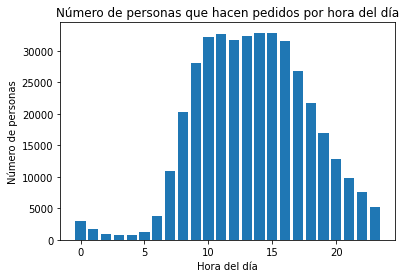

In [37]:
# Agrupa por hora del día y cuenta la cantidad de personas que hacen pedidos
orders_by_hour = orders.groupby('order_hour_of_day')['user_id'].nunique()
# Gráfico de barras para mostrar la distribución
plt.bar(orders_by_hour.index, orders_by_hour.values)
plt.xlabel('Hora del día')
plt.ylabel('Número de personas')
plt.title('Número de personas que hacen pedidos por hora del día')
plt.show()

<div class="alert alert-block alert-info">
<b>hecho</b> <a class="tocSkip"></a>
</div>

* Esto indica que hay un aumento significativo en la cantidad de personas que realizan pedidos entre las 9 a.m. y las 4 p.m. Es un patrón común ya que estas horas suelen estar relacionadas con el horario comercial estándar y probablemente refleje el momento en que la mayoría de las personas realizan sus compras diarias.

### [A3] ¿Qué día de la semana compran víveres las personas?

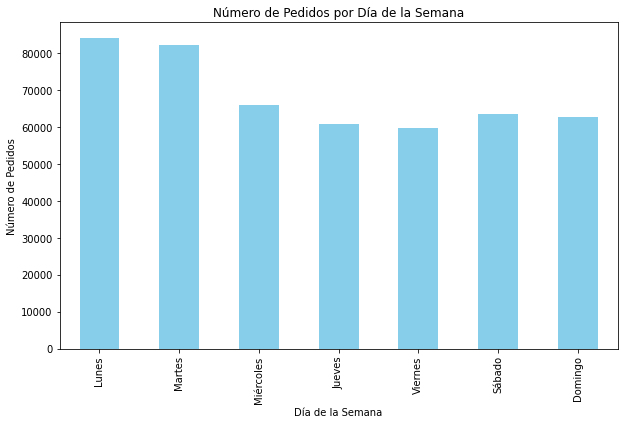

In [38]:
# Mapeo de números de día a nombres de día
dow_mapping = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
# Crear una nueva columna 'day_of_week' con nombres de días y especificar el orden
orders['day_of_week'] = orders['order_dow'].map(dow_mapping)
days_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
orders['day_of_week'] = pd.Categorical(orders['day_of_week'], categories=days_order, ordered=True)
# Crear un gráfico que muestre qué día de la semana la gente hace sus compras
orders['day_of_week'].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Número de Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.show()

* El análisis de los días de la semana en que se realizan los pedidos revela que los lunes y martes tienen un número considerablemente mayor de pedidos, superando los 80,000, mientras que de miércoles a domingo se mantiene más constante, con cifras entre 60,000 y 70,000. Esto sugiere variaciones en los patrones de compra a lo largo de la semana, con un inicio fuerte al principio.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

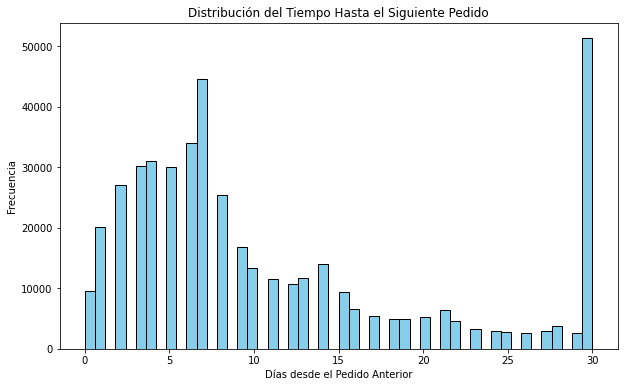

Valor mínimo de días hasta el siguiente pedido: 0.0
Valor máximo de días hasta el siguiente pedido: 30.0


In [39]:
# Visualizar la distribución del tiempo que las personas esperan hasta hacer otro pedido
plt.figure(figsize=(10, 6))
plt.hist(orders['days_since_prior_order'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución del Tiempo Hasta el Siguiente Pedido')
plt.xlabel('Días desde el Pedido Anterior')
plt.ylabel('Frecuencia')
plt.show()
# Calcular los valores mínimo y máximo
min_days = orders['days_since_prior_order'].min()
max_days = orders['days_since_prior_order'].max()
print(f"Valor mínimo de días hasta el siguiente pedido: {min_days}")
print(f"Valor máximo de días hasta el siguiente pedido: {max_days}")

* La observación del comportamiento de compra a lo largo del mes, se sugiere que la disminución en la frecuencia de pedidos hacia el final del mes podría estar relacionada con factores económicos, como la fecha de pago de sueldos. Este patrón podría indicar que las personas tienden a realizar más pedidos al principio del mes cuando cuentan con más recursos financieros.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
# Filtra los datos para miércoles y sábados
wednesday_data = orders[orders['order_dow'] == 3]
saturday_data = orders[orders['order_dow'] == 6]

In [41]:
# Calcula la distribución de 'order_hour_of_day' para miércoles
wednesday_distribution = wednesday_data['order_hour_of_day'].value_counts().sort_index()

In [42]:
# Calcula la distribución de 'order_hour_of_day' para sábados
saturday_distribution = saturday_data['order_hour_of_day'].value_counts().sort_index()

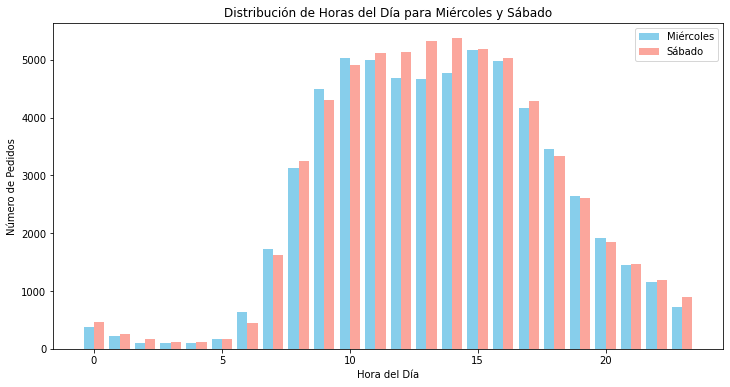

In [43]:
# Crea gráficos de barra para 'order_hour_of_day' en miércoles y sábados
plt.figure(figsize=(12, 6))
plt.bar(wednesday_distribution.index - 0.2, wednesday_distribution, color='skyblue', width=0.4, label='Miércoles')
plt.bar(saturday_distribution.index + 0.2, saturday_distribution, color='salmon', width=0.4, label='Sábado', alpha=0.7)
# Ajusta la apariencia del gráfico
plt.title('Distribución de Horas del Día para Miércoles y Sábado')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.show()

* Parece que, durante los días laborables, especialmente en las primeras horas del día, hay una mayor cantidad de pedidos en comparación con los sábados(o fin de semanas). Esta disminución en la cantidad de pedidos los sábados por la mañana puede deberse al hecho de que las personas tienden a descansar o realizar otras actividades durante el fin de semana, y luego hay un aumento en las horas del almuerzo, indicando que es posible que las personas estén haciendo pedidos después de levantarse más tarde durante los fines de semana.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
# Agrupa por usuario y cuenta el número de pedidos
orders_per_user = orders.groupby('user_id')['order_number'].max().value_counts()

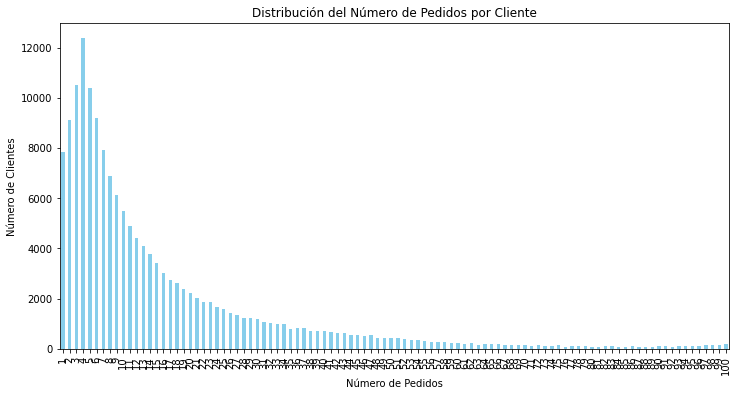

In [45]:
# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
orders_per_user.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.show()

* Podemos concluir que la mayoría de los clientes realizan un número relativamente bajo de pedidos, con un pico alrededor de 4 pedidos por cliente. A medida que el número de pedidos por cliente aumenta, la frecuencia disminuye, siguiendo una distribución que se asemeja a una curva logarítmica. Este patrón sugiere que hay muchos clientes ocasionales o esporádicos que realizan solo unos pocos pedidos, mientras que la proporción de clientes que realizan un mayor número de pedidos disminuye gradualmente.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
top_products = order_products['product_id'].value_counts().head(20)

In [47]:
top_products_info = products[products['product_id'].isin(top_products.index)][['product_id', 'product_name']]

In [48]:
print(top_products_info)

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
40705       40706    Organic Grape Tomatoes
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49682       49683            Cucumber Kirby


* Los 20 productos más populares incluyen principalmente frutas y verduras orgánicas, así como algunos productos básicos como leche orgánica y aguacates orgánicos. Los clientes parecen tener una preferencia por productos frescos y saludables.
Puede ser útil para la gestión de inventario y estrategias de marketing para destacar estos productos populares.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
# Cálculo del número promedio de artículos por pedido
average_items_per_order = order_products.groupby('order_id')['product_id'].count().mean()


In [50]:
# Distribución del número de artículos por pedido
items_per_order_distribution = order_products.groupby('order_id')['product_id'].count()

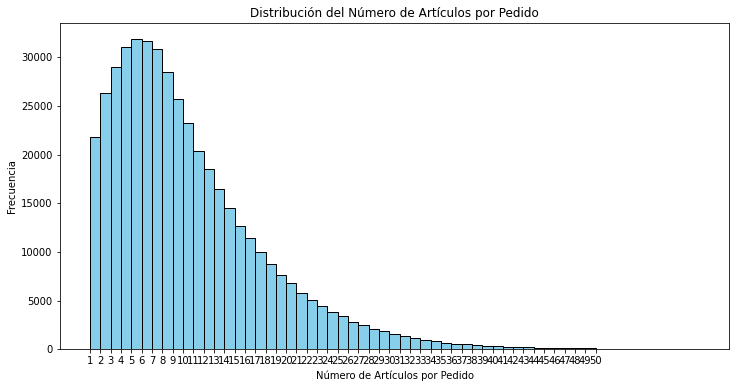

Número promedio de artículos por pedido: 10.10


In [51]:
# Gráfico de la distribución
plt.figure(figsize=(12, 6))
plt.hist(order_products.groupby('order_id')['product_id'].count(), bins=range(1, 61), color='skyblue', edgecolor='black')
plt.title('Distribución del Número de Artículos por Pedido')
plt.xlabel('Número de Artículos por Pedido')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 51)) #decidi bajar el rango de numeros de articulos a 50 ya que despues de eso las barras no eran visibles
plt.show()
# Imprimir el número promedio de artículos por pedido
print(f"Número promedio de artículos por pedido: {average_items_per_order:.2f}")

* En promedio, las personas tienden a comprar alrededor de 10 artículos por pedido. La distribución del número de artículos por pedido proporciona más detalles sobre la variabilidad en la cantidad de productos que los clientes incluyen en sus pedidos. Puede observarse en el histograma cómo se distribuyen los pedidos en función del número de artículos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
# Filtrar productos que fueron vuelto a pedir (reordered == 1)
reordered_products = order_products[order_products['reordered'] == 1]
# Calcular la frecuencia de productos que vuelven a pedirse
product_reorder_frequency = reordered_products.groupby('product_id')['reordered'].mean()

In [53]:
# Obtener los 20 principales productos que vuelven a pedirse
top_reordered_products = product_reorder_frequency.sort_values(ascending=False).head(20)
# Fusionar con la información de productos
top_reordered_products_info = pd.merge(top_reordered_products, products[['product_id', 'product_name']], left_index=True, right_on='product_id')

In [54]:
# Establecer opciones de formato
pd.set_option('display.max_colwidth', None)  # Para mostrar todo el contenido de las celdas
pd.set_option('display.max_columns', None)   # Para mostrar todas las columnas

In [55]:
# Imprimir la tabla formateada
print(top_reordered_products_info[['product_id', 'product_name', 'reordered']].to_string(index=False))

 product_id                                               product_name  reordered
          1                                 Chocolate Sandwich Cookies          1
      33139                            Vegetarian Worcestershire Sauce          1
      33131                                 Hair Remover Wax Strip Kit          1
      33132                                        Mild Red Taco Sauce          1
      33134                               Orange Recovery Energy Drink          1
      33135                                    Organic Blueberry Kefir          1
      33136                                Tissue with Lotion Aloe & E          1
      33138                       Classic Chopped Grill Feast Cat Food          1
      33140                       Cruisers Diapers Jumbo Pack - Size 6          1
      33129                                             Classic Hummus          1
      33142                                                    Unknown          1
      33143     

* Estos productos tienen una tasa de repetición del 100%, lo que significa que son siempre pedidos nuevamente cuando los clientes realizan compras adicionales.

<div class="alert alert-block alert-info">
<b>hecho</b> <a class="tocSkip"></a>
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
# Calcular la proporción de veces que un producto se pide y se vuelve a pedir
product_purchased_ratio = order_products.groupby('product_id')['reordered'].count() / len(orders)

In [57]:
product_reorder_ratio = order_products.groupby('product_id')['reordered'].mean()

In [58]:
# Mostrar las primeras 20 filas con las proporciones de compra y repetición
print(pd.DataFrame({'Purchase Ratio': product_purchased_ratio, 'Reorder Ratio': product_reorder_ratio}).head(20))

            Purchase Ratio  Reorder Ratio
product_id                               
1                 0.000585       0.564286
2                 0.000023       0.000000
3                 0.000088       0.738095
4                 0.000102       0.510204
7                 0.000004       0.500000
8                 0.000040       0.315789
9                 0.000044       0.761905
10                0.000704       0.448071
11                0.000033       0.625000
12                0.000086       0.390244
13                0.000004       0.500000
14                0.000006       0.000000
17                0.000002       0.000000
18                0.000031       0.533333
19                0.000002       0.000000
21                0.000002       0.000000
22                0.000013       0.500000
23                0.000307       0.380952
24                0.000004       0.000000
25                0.000616       0.674576


* Se puede ver una diferencia en las comparaciones de la proporcion de las veces que un porducto se pide y vuelve pedir.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
# Combinar los DataFrames orders y order_products para obtener user_id en order_products
merged_data = pd.merge(order_products, orders[['order_id', 'user_id']], on='order_id', how='left')

# Calcular la proporción de productos ya pedidos por cada cliente
customer_product_reorder_ratio = merged_data.groupby(['user_id', 'product_id'])['reordered'].mean()
customer_reorder_ratio = customer_product_reorder_ratio.groupby('user_id').mean()

In [60]:
# Mostrar las primeras filas de la proporción de repetición de pedidos por cliente
print(customer_reorder_ratio)

user_id
2         0.020000
4         0.000000
5         0.666667
6         0.000000
7         0.923077
            ...   
206203    0.222222
206206    0.676471
206207    0.848485
206208    0.577083
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


* Se puede ver el porcentaje de veces que a pedido productos ateriormente, en proporcion a las compras totales por cada usuario. 

 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con los cálculos de ambas tasas.
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
# Obtener los productos que se añaden primero al carrito
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]

In [62]:
# Contar la frecuencia de cada producto y obtener los 20 principales
top_first_in_cart = first_in_cart['product_id'].value_counts().head(20)

In [63]:
# Obtener la información detallada de los productos
top_first_in_cart_info = products[products['product_id'].isin(top_first_in_cart.index)][['product_id', 'product_name']]
# Mostrar los resultados
print(top_first_in_cart_info)

       product_id                 product_name
195           196                         Soda
5784         5785  Organic Reduced Fat 2% Milk
12340       12341                Hass Avocados
13175       13176       Bag of Organic Bananas
16796       16797                 Strawberries
19659       19660                 Spring Water
21136       21137         Organic Strawberries
21902       21903         Organic Baby Spinach
22934       22935         Organic Yellow Onion
24851       24852                       Banana
26208       26209                        Limes
27085       27086                  Half & Half
27844       27845           Organic Whole Milk
27965       27966          Organic Raspberries
38688       38689     Organic Reduced Fat Milk
44631       44632   Sparkling Water Grapefruit
47208       47209         Organic Hass Avocado
47625       47626                  Large Lemon
47765       47766              Organic Avocado
49234       49235          Organic Half & Half


Podemos concluir basado en los 20 primeros productos elegidos por los usuarios son:

* Productos comunes de uso diario: Artículos como Soda, leche orgánica reducida en grasa, aguacates y bananas orgánicas son esenciales y comúnmente agregados primero al carrito.
* Preferencia por productos orgánicos: La presencia de productos orgánicos como fresas y espinacas en el top 20 sugiere una preferencia por opciones saludables y orgánicas.
* Variedad de productos frescos: La inclusión de frutas como limones y opciones frescas como aguacates indica la preferencia por alimentos frescos y saludables.
* Inclusión de bebidas y lácteos: Artículos como agua, leche y productos lácteos también son populares al inicio de las compras.

Estas observaciones proporcionan una visión rápida de las preferencias generales de compra de los usuarios.

### Conclusion general del proyecto:

Con base en los resultados obtenidos del análisis:

Hora del día y Día de la semana:
* Todos los valores en 'order_hour_of_day' son sensibles (True).(se confirma que los datos estan bien ingresados)
* Todos los valores en 'order_dow' son sensibles (True).(se confirma que los datos estan bien ingresados)

Numero de Pedidos por Día de la Semana:
* El día con más pedidos es el lunes, seguido de martes y miércoles. El domingo y el sábado también tienen un número significativo de pedidos.

Número de Pedidos por Hora del Día:
* La mayoría de los pedidos se realizan entre las 9 am y las 4 pm, con un pico alrededor de las 10 am.

Proporción de productos repetidos por producto:
* La proporción de productos repetidos varía para diferentes productos. Por ejemplo, el producto con 'product_id' 1 tiene una proporción de repetición de aproximadamente 56.4%.

Top 20 productos más populares:
* Los productos más populares incluyen productos como 'Bone Strength Take Care', 'Vanilla Sandwich Cookies', y otros, con una proporción de repetición del 100%.
Proporción de productos repetidos por cliente:
* La proporción de productos repetidos varía para diferentes clientes. Algunos clientes tienen una alta proporción de productos repetidos, mientras que otros tienen una proporción más baja.
Top 20 productos que la gente pone primero en sus carritos:
* Los productos que la gente suele agregar primero a sus carritos incluyen artículos comunes como plátanos, aguacates orgánicos, leche orgánica, fresas orgánicas, entre otros.

Estas conclusiones proporcionan información valiosa sobre los patrones de compra, preferencias y comportamientos de los clientes en la plataforma.

 <div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo, Bastian. Nos quedan algunos elementos por corregir. He dejado comentarios a lo largo del documento para ello.
    
</div>

<div class="alert alert-block alert-info">
<b>Se han aplicado los cambios instruidos por vuestra parte, se agradece y espero poder seguir mejorando el codigo, y mis conclusiones a lo largo de este Bootcamp</b> <a class="tocSkip"></a>
</div>

 <div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
    
</div>